In [1]:
#import modules
%run ../../load_main.py
from Air_Quality_notebooks import utils as utl
from WRFChemToolkit.analysis import statistics as st, aerosols_202 as aer
import matplotlib.pyplot as plt

# Ozone: DM8H linearity by sector

In [2]:
o3= pd.read_excel('o3DM8H_changes.xlsx').set_index('Unnamed: 0')

In [3]:
t='_vals'
d2 = o3.filter(regex=t).reset_index().rename({'Unnamed: 0':'sectors'},axis=1).set_index('sectors')

In [4]:
d2['base_vals']=d2.iloc[0]['base_vals']
d2=d2.iloc[1: , :].reset_index()

In [5]:
d2=d2.rename(columns={s: int((float((s.split('_')[0].split('x')[1]))-1)*100+100) for s in d2.columns if s.startswith('x')})
d2=d2.rename({'base_vals':'100'},axis=1)

In [6]:
d2=d2.set_index('sectors').rename({'TRA':'NCT_TRA','DOM':'NCT_DOM','IPO':'NCT_IPO'},axis=0).reset_index()

In [7]:
d2=d2.melt(id_vars=["sectors"], 
        var_name="scale_factor", 
        value_name="value")
d2.scale_factor=d2.scale_factor.astype(float)

In [8]:
d2

,sectors,scale_factor,value
0,NCT_DOM,100.0,82.106865
1,NCT_IPO,100.0,82.106865
2,NCT_TRA,100.0,82.106865
3,NCR_DOM,100.0,82.106865
4,NCR_IPO,100.0,82.106865
...,...,...,...
58,NCT_TRA,200.0,59.969955
59,NCR_DOM,200.0,81.062653
60,NCR_IPO,200.0,73.676941
61,NCR_TRA,200.0,63.322990


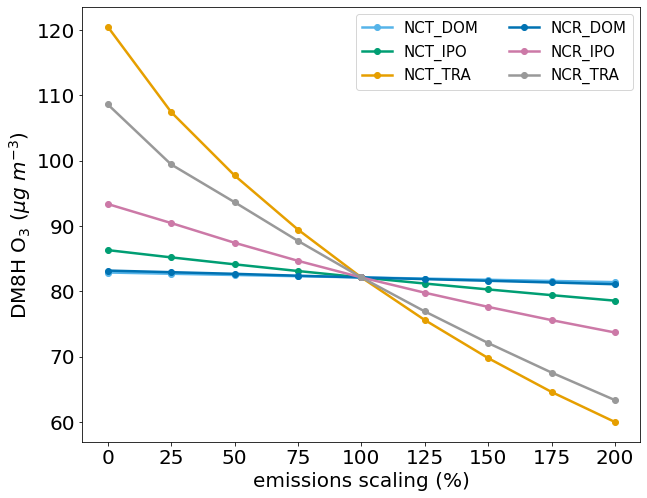

In [9]:
colors=["#56B4E9","#009E73","#E69F00","#0072B2","#CC79A7","#999999"] 
sec=['NCT_DOM', 'NCT_IPO', 'NCT_TRA', 'NCR_DOM', 'NCR_IPO', 'NCR_TRA']
fig, ax = plt.subplots(figsize=[10,8])
# Change the plot dimensions (width, height)
for s,i in zip(sec,colors):
    t = d2[d2['sectors']==s].sort_values(by='value')
    ax.plot(t.scale_factor,t.value,'o-',label=s,color=i,linewidth=2.5)
    ax.tick_params(axis='both', which='major', labelsize=20)
    plt.xlabel('emissions scaling (%)',fontsize=20) 
    plt.ylabel('DM8H O$_{3}$ ($\mu g~m^{-3}$)',fontsize=20) 
plt.legend(loc="top right",ncol=2,fontsize=15) 

In [10]:
#fig.savefig('./figS9d.png', format='png', box_inches="tight",dpi=300)

In [11]:
# save linearity coefficients
d2.to_excel('o3DM8H_linear.xlsx')

# Ozone: DM8H interactions by sectors

In [12]:
t='_abs'
do = o3.filter(regex=t).T

In [13]:
do=do.rename(index={s: s.split('_')[0] for s in do.index})

In [14]:
do=do.rename(columns={'DOM':'NCT_DOM','TRA':'NCT_TRA','IPO':'NCT_IPO'})

In [15]:
do=do.rename(index={s: int((float((s.split('_')[0].split('x')[1]))-1)*100+100) for s in do.index})

In [16]:
do

Unnamed: 0,BASE,NCT_DOM,NCT_IPO,NCT_TRA,NCR_DOM,NCR_IPO,NCR_TRA,ALL
0,0.0,0.751873,4.181270,38.381580,1.047476,11.238186,26.492561,55.447803
25,0.0,0.562092,3.068469,25.316221,0.802802,8.325274,17.294401,63.488914
50,0.0,0.373219,2.002776,15.614562,0.550527,5.306743,11.519275,39.564217
75,0.0,0.185566,0.981417,7.323915,0.262105,2.541735,5.594766,17.844795
125,0.0,-0.180564,-0.935011,-6.523077,-0.259924,-2.340537,-5.204371,-14.564964
150,0.0,-0.361384,-1.838707,-12.354550,-0.512493,-4.513132,-10.045731,-26.252361
175,0.0,-0.540472,-2.713401,-17.536211,-0.774917,-6.537492,-14.566783,-35.530838
200,0.0,-0.717209,-3.559535,-22.136908,-1.044212,-8.429921,-18.783871,-42.843361


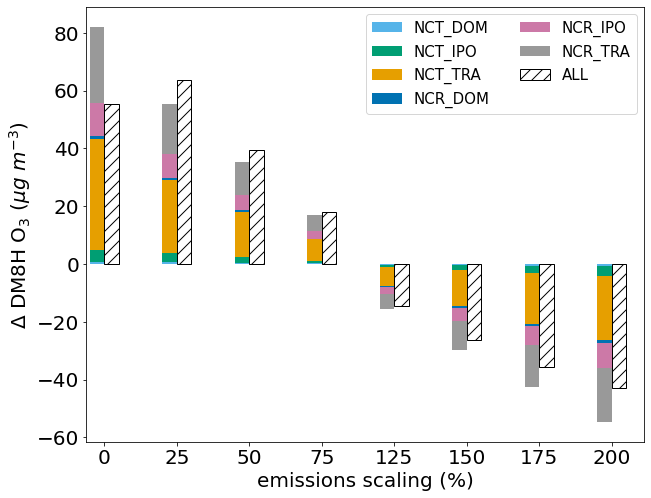

In [17]:
# x values
colorsNCT=["#56B4E9","#009E73","#E69F00"] 
colorsNCR=["#0072B2","#CC79A7","#999999"] 
ax = do[['NCT_DOM','NCT_IPO','NCT_TRA','NCR_DOM','NCR_IPO','NCR_TRA']].plot.bar(stacked=True, position=1,
                            width=.2,rot=0, color=colorsNCT+colorsNCR)
do[['ALL']].plot.bar(ax=ax, position=0, width=.2,color='white',hatch='//',edgecolor='black',rot=0)


fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(10, 8)
# Change the axes labels
ax.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel("emissions scaling (%)", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.ylabel("$\Delta$ DM8H O$_{3}$ ($\mu g~m^{-3}$)",fontsize=20)
ax.legend(loc="top right",ncol=2,fontsize=15)